In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file_path = '/content/Workforce_Burnout_100_Employees_Real_Names.xlsx'

employees = pd.read_excel(file_path, sheet_name='employees')
attendance = pd.read_excel(file_path, sheet_name='attendance')
tasks = pd.read_excel(file_path, sheet_name='tasks')
performance = pd.read_excel(file_path, sheet_name='performance')
leaves = pd.read_excel(file_path, sheet_name='leaves')


In [ ]:
employees.head()


,employee_id,employee_name,department,role,manager_id,joining_date,location
0,E001,Kavya,HR,Engineer,M004,2021-06-22,Kochi
1,E002,Isha,Finance,Engineer,M001,2023-01-09,Kochi
2,E003,Kavya,HR,Analyst,M004,2020-01-31,Bengaluru
3,E004,Rohan,Finance,Engineer,M004,2020-01-18,Hyderabad
4,E005,Asha,Finance,Analyst,M004,2021-12-26,Hyderabad


In [ ]:
attendance


,attendance_id,employee_id,work_date,login_time,logout_time
0,A0001,E001,2024-01-01,09:37,22:37
1,A0002,E001,2024-01-02,09:50,19:50
2,A0003,E001,2024-01-03,09:48,17:48
3,A0004,E001,2024-01-04,09:59,17:59
4,A0005,E001,2024-01-05,09:39,18:39
...,...,...,...,...,...
995,A0996,E100,2024-01-06,09:42,17:42
996,A0997,E100,2024-01-07,09:11,21:11
997,A0998,E100,2024-01-08,09:28,22:28
998,A0999,E100,2024-01-09,09:43,20:43


In [ ]:
tasks.head()


,task_id,employee_id,task_type,task_hours,task_status
0,T0001,E001,Core,7,Pending
1,T0002,E002,Core,6,Pending
2,T0003,E003,Core,5,Completed
3,T0004,E004,Support,7,Pending
4,T0005,E005,Support,9,Completed


In [ ]:
performance.head()


,performance_id,employee_id,month,performance_score
0,P0001,E001,2024-01,3.5
1,P0002,E002,2024-01,2.7
2,P0003,E003,2024-01,4.8
3,P0004,E004,2024-01,4.6
4,P0005,E005,2024-01,4.6


In [ ]:
leaves.head()

,leave_id,employee_id,leave_type,leave_days
0,L0001,E001,Sick,2
1,L0002,E002,Casual,4
2,L0003,E003,Sick,5
3,L0004,E004,Casual,5
4,L0005,E005,Casual,2


In [ ]:
employees.duplicated().sum()
attendance.duplicated().sum()
tasks.duplicated().sum()
performance.duplicated().sum()
leaves.duplicated().sum()



np.int64(0)

In [ ]:
employees.drop_duplicates(inplace=True)
attendance.drop_duplicates(inplace=True)
tasks.drop_duplicates(inplace=True)
performance.drop_duplicates(inplace=True)
leaves.drop_duplicates(inplace=True)


In [ ]:
employees.isnull().sum()
attendance.isnull().sum()


,0
attendance_id,0
employee_id,0
work_date,0
login_time,0
logout_time,0


In [ ]:
attendance['work_date'] = pd.to_datetime(attendance['work_date'])

attendance['login_time'] = pd.to_datetime(
    attendance['login_time'], format='%H:%M'
)

attendance['logout_time'] = pd.to_datetime(
    attendance['logout_time'], format='%H:%M'
)
attendance

,attendance_id,employee_id,work_date,login_time,logout_time
0,A0001,E001,2024-01-01,1900-01-01 09:37:00,1900-01-01 22:37:00
1,A0002,E001,2024-01-02,1900-01-01 09:50:00,1900-01-01 19:50:00
2,A0003,E001,2024-01-03,1900-01-01 09:48:00,1900-01-01 17:48:00
3,A0004,E001,2024-01-04,1900-01-01 09:59:00,1900-01-01 17:59:00
4,A0005,E001,2024-01-05,1900-01-01 09:39:00,1900-01-01 18:39:00
...,...,...,...,...,...
995,A0996,E100,2024-01-06,1900-01-01 09:42:00,1900-01-01 17:42:00
996,A0997,E100,2024-01-07,1900-01-01 09:11:00,1900-01-01 21:11:00
997,A0998,E100,2024-01-08,1900-01-01 09:28:00,1900-01-01 22:28:00
998,A0999,E100,2024-01-09,1900-01-01 09:43:00,1900-01-01 20:43:00


In [ ]:
attendance['working_hours'] = (
    attendance['logout_time'] - attendance['login_time']
).dt.total_seconds() / 3600
attendance

,attendance_id,employee_id,work_date,login_time,logout_time,working_hours
0,A0001,E001,2024-01-01,1900-01-01 09:37:00,1900-01-01 22:37:00,13.0
1,A0002,E001,2024-01-02,1900-01-01 09:50:00,1900-01-01 19:50:00,10.0
2,A0003,E001,2024-01-03,1900-01-01 09:48:00,1900-01-01 17:48:00,8.0
3,A0004,E001,2024-01-04,1900-01-01 09:59:00,1900-01-01 17:59:00,8.0
4,A0005,E001,2024-01-05,1900-01-01 09:39:00,1900-01-01 18:39:00,9.0
...,...,...,...,...,...,...
995,A0996,E100,2024-01-06,1900-01-01 09:42:00,1900-01-01 17:42:00,8.0
996,A0997,E100,2024-01-07,1900-01-01 09:11:00,1900-01-01 21:11:00,12.0
997,A0998,E100,2024-01-08,1900-01-01 09:28:00,1900-01-01 22:28:00,13.0
998,A0999,E100,2024-01-09,1900-01-01 09:43:00,1900-01-01 20:43:00,11.0


In [ ]:
attendance[['employee_id', 'working_hours']].head()
#to check
attendance[attendance['employee_id'] == 'E001'][['work_date','working_hours']]



,work_date,working_hours
0,2024-01-01,13.0
1,2024-01-02,10.0
2,2024-01-03,8.0
3,2024-01-04,8.0
4,2024-01-05,9.0
5,2024-01-06,8.0
6,2024-01-07,8.0
7,2024-01-08,10.0
8,2024-01-09,12.0
9,2024-01-10,13.0


In [ ]:
attendance['overtime_flag'] = attendance['working_hours'].apply(
    lambda x: 1 if x > 9 else 0
)
attendance

,attendance_id,employee_id,work_date,login_time,logout_time,working_hours,overtime_flag
0,A0001,E001,2024-01-01,1900-01-01 09:37:00,1900-01-01 22:37:00,13.0,1
1,A0002,E001,2024-01-02,1900-01-01 09:50:00,1900-01-01 19:50:00,10.0,1
2,A0003,E001,2024-01-03,1900-01-01 09:48:00,1900-01-01 17:48:00,8.0,0
3,A0004,E001,2024-01-04,1900-01-01 09:59:00,1900-01-01 17:59:00,8.0,0
4,A0005,E001,2024-01-05,1900-01-01 09:39:00,1900-01-01 18:39:00,9.0,0
...,...,...,...,...,...,...,...
995,A0996,E100,2024-01-06,1900-01-01 09:42:00,1900-01-01 17:42:00,8.0,0
996,A0997,E100,2024-01-07,1900-01-01 09:11:00,1900-01-01 21:11:00,12.0,1
997,A0998,E100,2024-01-08,1900-01-01 09:28:00,1900-01-01 22:28:00,13.0,1
998,A0999,E100,2024-01-09,1900-01-01 09:43:00,1900-01-01 20:43:00,11.0,1


In [ ]:
attendance.groupby('employee_id')['overtime_flag'].sum()


,overtime_flag
employee_id,
E001,5
E002,6
E003,6
E004,5
E005,5
...,...
E096,8
E097,9
E098,6


In [ ]:
attendance['working_hours'].describe()


,working_hours
count,1000.000000
mean,10.397000
std,1.732164
min,8.000000
25%,9.000000
50%,10.000000
75%,12.000000
max,13.000000


In [ ]:
attendance['overtime_flag'].value_counts()


,count
overtime_flag,
1,641
0,359


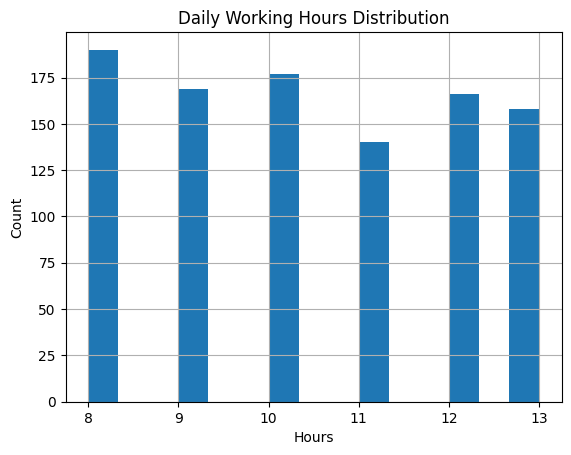

In [ ]:
attendance['working_hours'].hist(bins=15)
plt.title('Daily Working Hours Distribution')
plt.xlabel('Hours')
plt.ylabel('Count')
plt.show()

In [ ]:
work_summary = attendance.groupby('employee_id').agg(
    avg_working_hours=('working_hours', 'mean'),
    overtime_days=('overtime_flag', 'sum')
).reset_index()
attendance

,attendance_id,employee_id,work_date,login_time,logout_time,working_hours,overtime_flag
0,A0001,E001,2024-01-01,1900-01-01 09:37:00,1900-01-01 22:37:00,13.0,1
1,A0002,E001,2024-01-02,1900-01-01 09:50:00,1900-01-01 19:50:00,10.0,1
2,A0003,E001,2024-01-03,1900-01-01 09:48:00,1900-01-01 17:48:00,8.0,0
3,A0004,E001,2024-01-04,1900-01-01 09:59:00,1900-01-01 17:59:00,8.0,0
4,A0005,E001,2024-01-05,1900-01-01 09:39:00,1900-01-01 18:39:00,9.0,0
...,...,...,...,...,...,...,...
995,A0996,E100,2024-01-06,1900-01-01 09:42:00,1900-01-01 17:42:00,8.0,0
996,A0997,E100,2024-01-07,1900-01-01 09:11:00,1900-01-01 21:11:00,12.0,1
997,A0998,E100,2024-01-08,1900-01-01 09:28:00,1900-01-01 22:28:00,13.0,1
998,A0999,E100,2024-01-09,1900-01-01 09:43:00,1900-01-01 20:43:00,11.0,1


In [ ]:
work_summary

,employee_id,avg_working_hours,overtime_days
0,E001,9.9,5
1,E002,9.9,6
2,E003,9.8,6
3,E004,10.2,5
4,E005,9.9,5
...,...,...,...
95,E096,11.0,8
96,E097,10.7,9
97,E098,10.5,6
98,E099,9.7,4


In [ ]:
leave_summary = leaves.groupby('employee_id').agg(
    total_leaves=('leave_days', 'sum')
).reset_index()
leave_summary


,employee_id,total_leaves
0,E001,2
1,E002,4
2,E003,5
3,E004,5
4,E005,2
...,...,...
95,E096,5
96,E097,1
97,E098,3
98,E099,2


In [ ]:
performance_summary = performance.groupby('employee_id').agg(
    avg_performance=('performance_score', 'mean')
).reset_index()
performance_summary


,employee_id,avg_performance
0,E001,3.5
1,E002,2.7
2,E003,4.8
3,E004,4.6
4,E005,4.6
...,...,...
95,E096,2.7
96,E097,4.3
97,E098,4.1
98,E099,4.2


In [ ]:
final_df = employees.merge(work_summary, on='employee_id', how='left') \
                    .merge(leave_summary, on='employee_id', how='left') \
                    .merge(performance_summary, on='employee_id', how='left')

final_df.fillna(0, inplace=True)
final_df


,employee_id,employee_name,department,role,manager_id,joining_date,location,avg_working_hours,overtime_days,total_leaves,avg_performance
0,E001,Kavya,HR,Engineer,M004,2021-06-22,Kochi,9.9,5,2,3.5
1,E002,Isha,Finance,Engineer,M001,2023-01-09,Kochi,9.9,6,4,2.7
2,E003,Kavya,HR,Analyst,M004,2020-01-31,Bengaluru,9.8,6,5,4.8
3,E004,Rohan,Finance,Engineer,M004,2020-01-18,Hyderabad,10.2,5,5,4.6
4,E005,Asha,Finance,Analyst,M004,2021-12-26,Hyderabad,9.9,5,2,4.6
...,...,...,...,...,...,...,...,...,...,...,...
95,E096,Nikhil,Operations,Analyst,M001,2021-06-26,Chennai,11.0,8,5,2.7
96,E097,Deepak,IT,Engineer,M004,2023-12-12,Kochi,10.7,9,1,4.3
97,E098,Sanjay,Operations,Executive,M003,2020-07-24,Bengaluru,10.5,6,3,4.1
98,E099,Karthik,HR,Executive,M002,2021-03-09,Kochi,9.7,4,2,4.2


In [ ]:
def burnout_risk(row):
    if row['avg_working_hours'] > 10 and row['total_leaves'] < 2:
        return 'High'
    elif row['avg_working_hours'] > 9:
        return 'Medium'
    else:
        return 'Low'

final_df['burnout_risk'] = final_df.apply(burnout_risk, axis=1)

final_df['burnout_risk'].value_counts()


,count
burnout_risk,
Medium,76
High,24


In [ ]:
final_df.to_csv('final_workforce_burnout_data.csv', index=False)
from google.colab import files
files.download('final_workforce_burnout_data.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>